In [1]:
using Random
using Distributions
using Plots

Random.seed!(1234);
rng = MersenneTwister(1234);
gr();

In [2]:
include("../neural_network/layer.jl");
include("../neural_network/cost_function.jl");
include("../neural_network/neural_network.jl");

In [72]:
function create_toy_data(func, sample_size, domain=[0.0, 1.0], noise=0.1)
    x = collect(reshape(range(domain[1], stop=domain[2], length=sample_size), sample_size))
    shuffle!(rng, x);
    noise = rand(Uniform(-noise, noise), sample_size);
    return x, func.(x) + noise
end

function func(x)
    2.0 * x + 0.7 * sin(2 * pi * x)
end

function square(x)
    return x^2
end

function sinusoidal(x)
    return sin(pi * x)
end

function absolute(x)
    if x >= 0.0
        return x
    else
        return -x
    end
end

function heaviside(x)
    sign_x = x / absolute(x)
    return 0.5 * (sign_x + 1.0)
end

heaviside (generic function with 1 method)

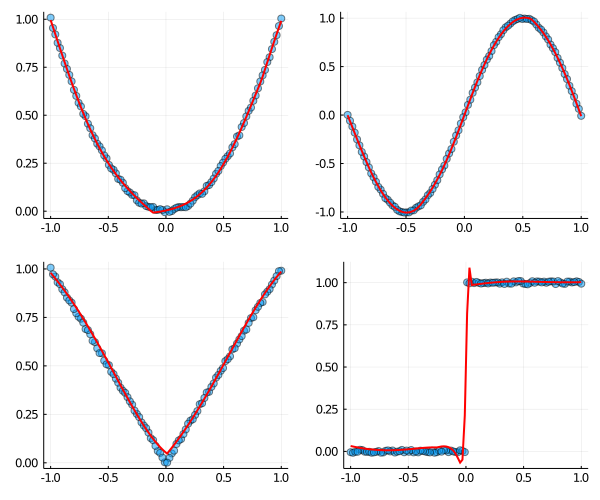

In [74]:
layers = [TanhLayer(1, 4), ReLULayer(4, 3), TanhLayer(3, 3),  LinearLayer(3, 1)];
cost_function = SumSquareError();
nn = NeuralNetwork(layers, cost_function);

toy_functions = [square, sinusoidal, absolute, heaviside];
domain = [-1.0, 1.0];

plots = [];
for toy_func in toy_functions
    x_train, y_train = create_toy_data(toy_func, 100, domain, 0.01);
    X = collect(reshape(x_train, 1, 100));
    t = collect(reshape(y_train, 1, 100));

    for i in 1:30000
        X = collect(reshape(x_train, 1, 100));
        t = collect(reshape(y_train, 1, 100));
    
        fitting(nn, X, t, 0.001);
    end

    x_test = collect(reshape(range(domain[1], domain[2], length=100), 1, 100));
    X_test = copy(x_test);
    X_test = predict(nn, X_test);

    x_test = collect(reshape(x_test, 100));
    X_test = collect(reshape(X_test, 100));
    p = plot(x_train, y_train, seriestype=:scatter, alpha=0.5);
    p = plot!(x_test, X_test, legend=nothing, lw=2, color="red");
    push!(plots, p);
end

plot(plots[1], plots[2], plots[3], plots[4], layout=(2, 2), size=(600, 500))